# Understanding flight delays ✈️

## 📖 Background

You work for a major airline operating flights across the USA. Flight delays are a
significant challenge for both the airline and passengers, causing disruptions, financial
losses, and dissatisfaction. As part of the airline’s data analytics team, your goal is to analyze historical flight data to uncover delay patterns, identify operational inefficiencies, and predict delays before they occur. By identifying delay patterns, predicting delays, and uncovering
the factors that contribute most to delays, you’ll be able to drive operational efficiency
and enhance the overall passenger experience. Your insights will help the airline make data-driven decisions to optimize scheduling, improve on-time performance, and enhance passenger satisfaction. 

Can you crack the code behind flight delays and revolutionize air travel? 



## 💾 The data

#### Your team provided you with 2 files with the following information ([source](https://www.kaggle.com/datasets/mahoora00135/flights/data)):

**flights.csv**
- `id` - Id number of the flight
- `year` - Year of Flight
- `month` - Month of Flight
- `day` - Day of Month
- `dep_time` - Time of departure (24h format)
- `sched_dep_time` - Scheduled departure time
- `dep_delay` - Delay in departure (minutes)
- `arr_time` - Time of arrival (24h format)
- `sched_arr_time` - Scheduled arrival time
- `arr_delay` - Delay in arrival (minutes)
- `carrier` - Airline company code  
- `flight` - Flight number 
- `tailnum`- Aircraft identifier number
- `origin` - Origin Airport - 3 letter code
- `dest` - Destination Airport - 3 letter code
- `air_time` - Duration of the flight (minutes)
- `distance` - Flight distance (miles)
- `hour` - Hour component of scheduled departure time
- `minute` - Minute component of scheduled departure time

**airlines_carrier_codes.csv**
- `Carrier Code` - Airline company code 
- `Airline Name` - Airline Name 


In [2]:
# We import all the libraries we will need for our analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

# We load the two raw data files into pandas DataFrames
flight_data = pd.read_csv('data/flights.csv')
airlines_codes = pd.read_csv('data/airlines_carrier_codes.csv')

# We display the first 5 rows of the flight data to check its structure
print("--- Flight Data Head ---")
flight_data.head()


--- Flight Data Head ---


,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
0,0,2023,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15
1,1,2023,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29
2,2,2023,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40
3,3,2023,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45
4,4,2023,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0


In [3]:
# We display the first 5 rows of the airlines data
print("\n--- Airlines Data Head ---")
airlines_codes.head()


--- Airlines Data Head ---


,Carrier Code,Airline Name
0,UA,United Airlines Inc.
1,AA,American Airlines Inc.
2,B6,JetBlue Airways
3,DL,Delta Air Lines Inc.
4,EV,ExpressJet Airlines Inc.


In [4]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      



In this cell, we are performing a "health check" on our `flight_data` to see how much data is missing. This is a critical first step in data cleaning.

Here is a breakdown of our code:

  * **`flight_data.isnull()`**: We first ask pandas to check every single cell in our DataFrame and return `True` if the cell is empty (null or NaN) or `False` if it has a value.
  * **`.sum()`**: We then sum up all the `True` values for each column. This gives us a complete count of how many missing values are in each column.
  * **`.sort_values(ascending=False)`**: We sort this list of counts from highest to lowest. This is very important as it immediately shows us which columns are the biggest "problem areas."
  * **`missing_values.head(7)`**: Finally, we display just the top 7 columns with the most missing data. This gives us a clean, prioritized list to focus on for our next cleaning steps.

In [5]:
missing_values = flight_data.isnull().sum().sort_values(ascending=False)
missing_values.head(7)

arr_delay    9430
air_time     9430
arr_time     8713
dep_time     8255
dep_delay    8255
tailnum      2512
flight          0
dtype: int64

In this crucial preprocessing step, we prepare our data for analysis. First, we handle missing data by dropping any rows that are missing an `arr_delay` or `dep_delay`, as they are essential for our analysis. Then, we rename the columns in the `airlines_codes` table to create a common `carrier` column. Finally, we merge the two datasets. This gives us our final, clean `merge_data` DataFrame, which links all flight data with the full airline names.

In [6]:
# 1. We handle missing values by dropping rows where key analytical columns (arr_delay and dep_delay) are missing.
flight_data_cleaned = flight_data.dropna(subset=['arr_delay', 'dep_delay'])

# 2. We rename the columns in the codes table to prepare for merging.
airlines_codes.rename(columns={'Carrier Code': 'carrier', 'Airline Name': 'airline_name'}, inplace=True)

# 3. We merge the two DataFrames on the common 'carrier' code.
#    We use an 'inner' merge to ensure every flight has a matching, known airline name.
merge_data = pd.merge(flight_data_cleaned, airlines_codes, how='inner', on='carrier')

# We display the info of our final, merged DataFrame to confirm it's ready.
print("\n--- Final Merged Data Info ---")
merge_data.info()


--- Final Merged Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327346 entries, 0 to 327345
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              327346 non-null  int64  
 1   year            327346 non-null  int64  
 2   month           327346 non-null  int64  
 3   day             327346 non-null  int64  
 4   dep_time        327346 non-null  float64
 5   sched_dep_time  327346 non-null  int64  
 6   dep_delay       327346 non-null  float64
 7   arr_time        327346 non-null  float64
 8   sched_arr_time  327346 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         327346 non-null  object 
 11  flight          327346 non-null  int64  
 12  tailnum         327346 non-null  object 
 13  origin          327346 non-null  object 
 14  dest            327346 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        327346 n

### Create All New Analytical Columns

This cell performs all our **feature engineering** by creating new columns to make our analysis possible. These new features are the foundation for all the analysis in the following sections.

* **Date & Day Features:** We first combine `year`, `month`, and `day` into a single `flight_date` column. From this, we can easily extract the text `day_name` (for plot labels) and the numerical `day_of_week` (for correct sorting).

* **Time of Day Features:** We get the `hour` from `sched_dep_time` (using `// 100`). We then define a custom function (`assign_time_of_day`) to sort these hours into logical bins ('Morning', 'Afternoon', etc.) and use `.apply()` to create the new `time_of_day` column.

* **Distance (Haul) Feature:** We "bin" the `distance` column by using `pd.cut`. We define `bins` (using `float('inf')` for the open-ended maximum) and `labels` ('Short Haul', 'Medium Haul', 'Long Haul') to create the `distance_category` column.

* **Operational Feature:** We create `time_gained_in_air` by subtracting `arr_delay` from `dep_delay`. This calculates if a flight crew "made up" time (a positive number) or lost more time (a negative number) while in the air.

In [7]:
# --- 1. Create flight_date and Day of Week Features ---
# We combine the separate year, month, and day columns into a single datetime object.
merge_data['flight_date'] = pd.to_datetime(merge_data[['year', 'month', 'day']])

# From the new flight_date, we extract the day name (for readability) 
# and the day number (0-6, for correct sorting).
merge_data['day_name'] = merge_data['flight_date'].dt.day_name()
merge_data['day_of_week'] = merge_data['flight_date'].dt.dayofweek

# --- 2. Create Custom Time of Day Bins ---
# We use floor division (//) to get the hour from the 'sched_dep_time' (e.g., 930 -> 9).
merge_data['hour'] = merge_data['sched_dep_time'] // 100

# We define a function to categorize the hours into our custom bins.
def assign_time_of_day(hour):
    if 3 <= hour <= 11:
        return 'Morning (3am-11am)'
    elif 12 <= hour <= 17:
        return 'Afternoon (12pm-5pm)'
    elif 18 <= hour <= 22:
        return 'Evening (6pm-10pm)'
    else:
        # This catches the wrap-around hours (23, 0, 1, 2)
        return 'Night (11pm-2am)'
# We 'apply' this function to the hour column to create our new feature.
merge_data['time_of_day'] = merge_data['hour'].apply(assign_time_of_day)

# --- 3. Create Distance Category (Haul) Bins ---
# We define the categories (in miles) and give them labels.
bins = [0, 750, 2000, float('inf')] # 0-750, 750-2000, 2000+
labels = ['Short Haul (<750 mi)', 'Medium Haul (750-2000 mi)', 'Long Haul (>2000 mi)']
merge_data['distance_category'] = pd.cut(merge_data['distance'], bins=bins, labels=labels)

# --- 4. Create "Time Gained in Air" Feature ---
# This calculates if pilots "make up" time in the air.
# A positive number means they made up time; a negative number means the flight got even later.
merge_data['time_gained_in_air'] = merge_data['dep_delay'] - merge_data['arr_delay']


print("All new analytical features have been created.")
merge_data[['flight_date', 'day_name', 'time_of_day', 'distance_category', 'time_gained_in_air']].head()

All new analytical features have been created.


,flight_date,day_name,time_of_day,distance_category,time_gained_in_air
0,2023-01-01,Sunday,Morning (3am-11am),Medium Haul (750-2000 mi),-9.0
1,2023-01-01,Sunday,Morning (3am-11am),Medium Haul (750-2000 mi),-16.0
2,2023-01-01,Sunday,Morning (3am-11am),Medium Haul (750-2000 mi),-31.0
3,2023-01-01,Sunday,Morning (3am-11am),Medium Haul (750-2000 mi),17.0
4,2023-01-01,Sunday,Morning (3am-11am),Medium Haul (750-2000 mi),19.0


# To answer Question 1; 
We calculate the average `dep_delay` and `arr_delay` for every airline and sort the results. This allows us to directly compare their on-time performance. The resulting bar chart is the best visualization for this, clearly highlighting which carriers have higher average delays and may have operational or policy differences.

                             dep_delay  arr_delay
airline_name                                     
Frontier Airlines Inc.       20.201175  21.920705
AirTran Airways Corporation  18.605984  20.115906
ExpressJet Airlines Inc.     19.838929  15.796431
Mesa Airlines Inc.           18.898897  15.556985
SkyWest Airlines Inc.        12.586207  11.931034
Envoy Air                    10.445381  10.774733
Southwest Airlines Co.       17.661657   9.649120
JetBlue Airways              12.967548   9.457973
Endeavor Air Inc.            16.439574   7.379669
United Airlines Inc.         12.016908   3.558011
US Airways Inc.               3.744693   2.129595
Virgin America               12.756646   1.764464
Delta Air Lines Inc.          9.223950   1.644341
American Airlines Inc.        8.569130   0.364291
Hawaiian Airlines Inc.        4.900585  -6.915205
Alaska Airlines Inc.          5.830748  -9.930889


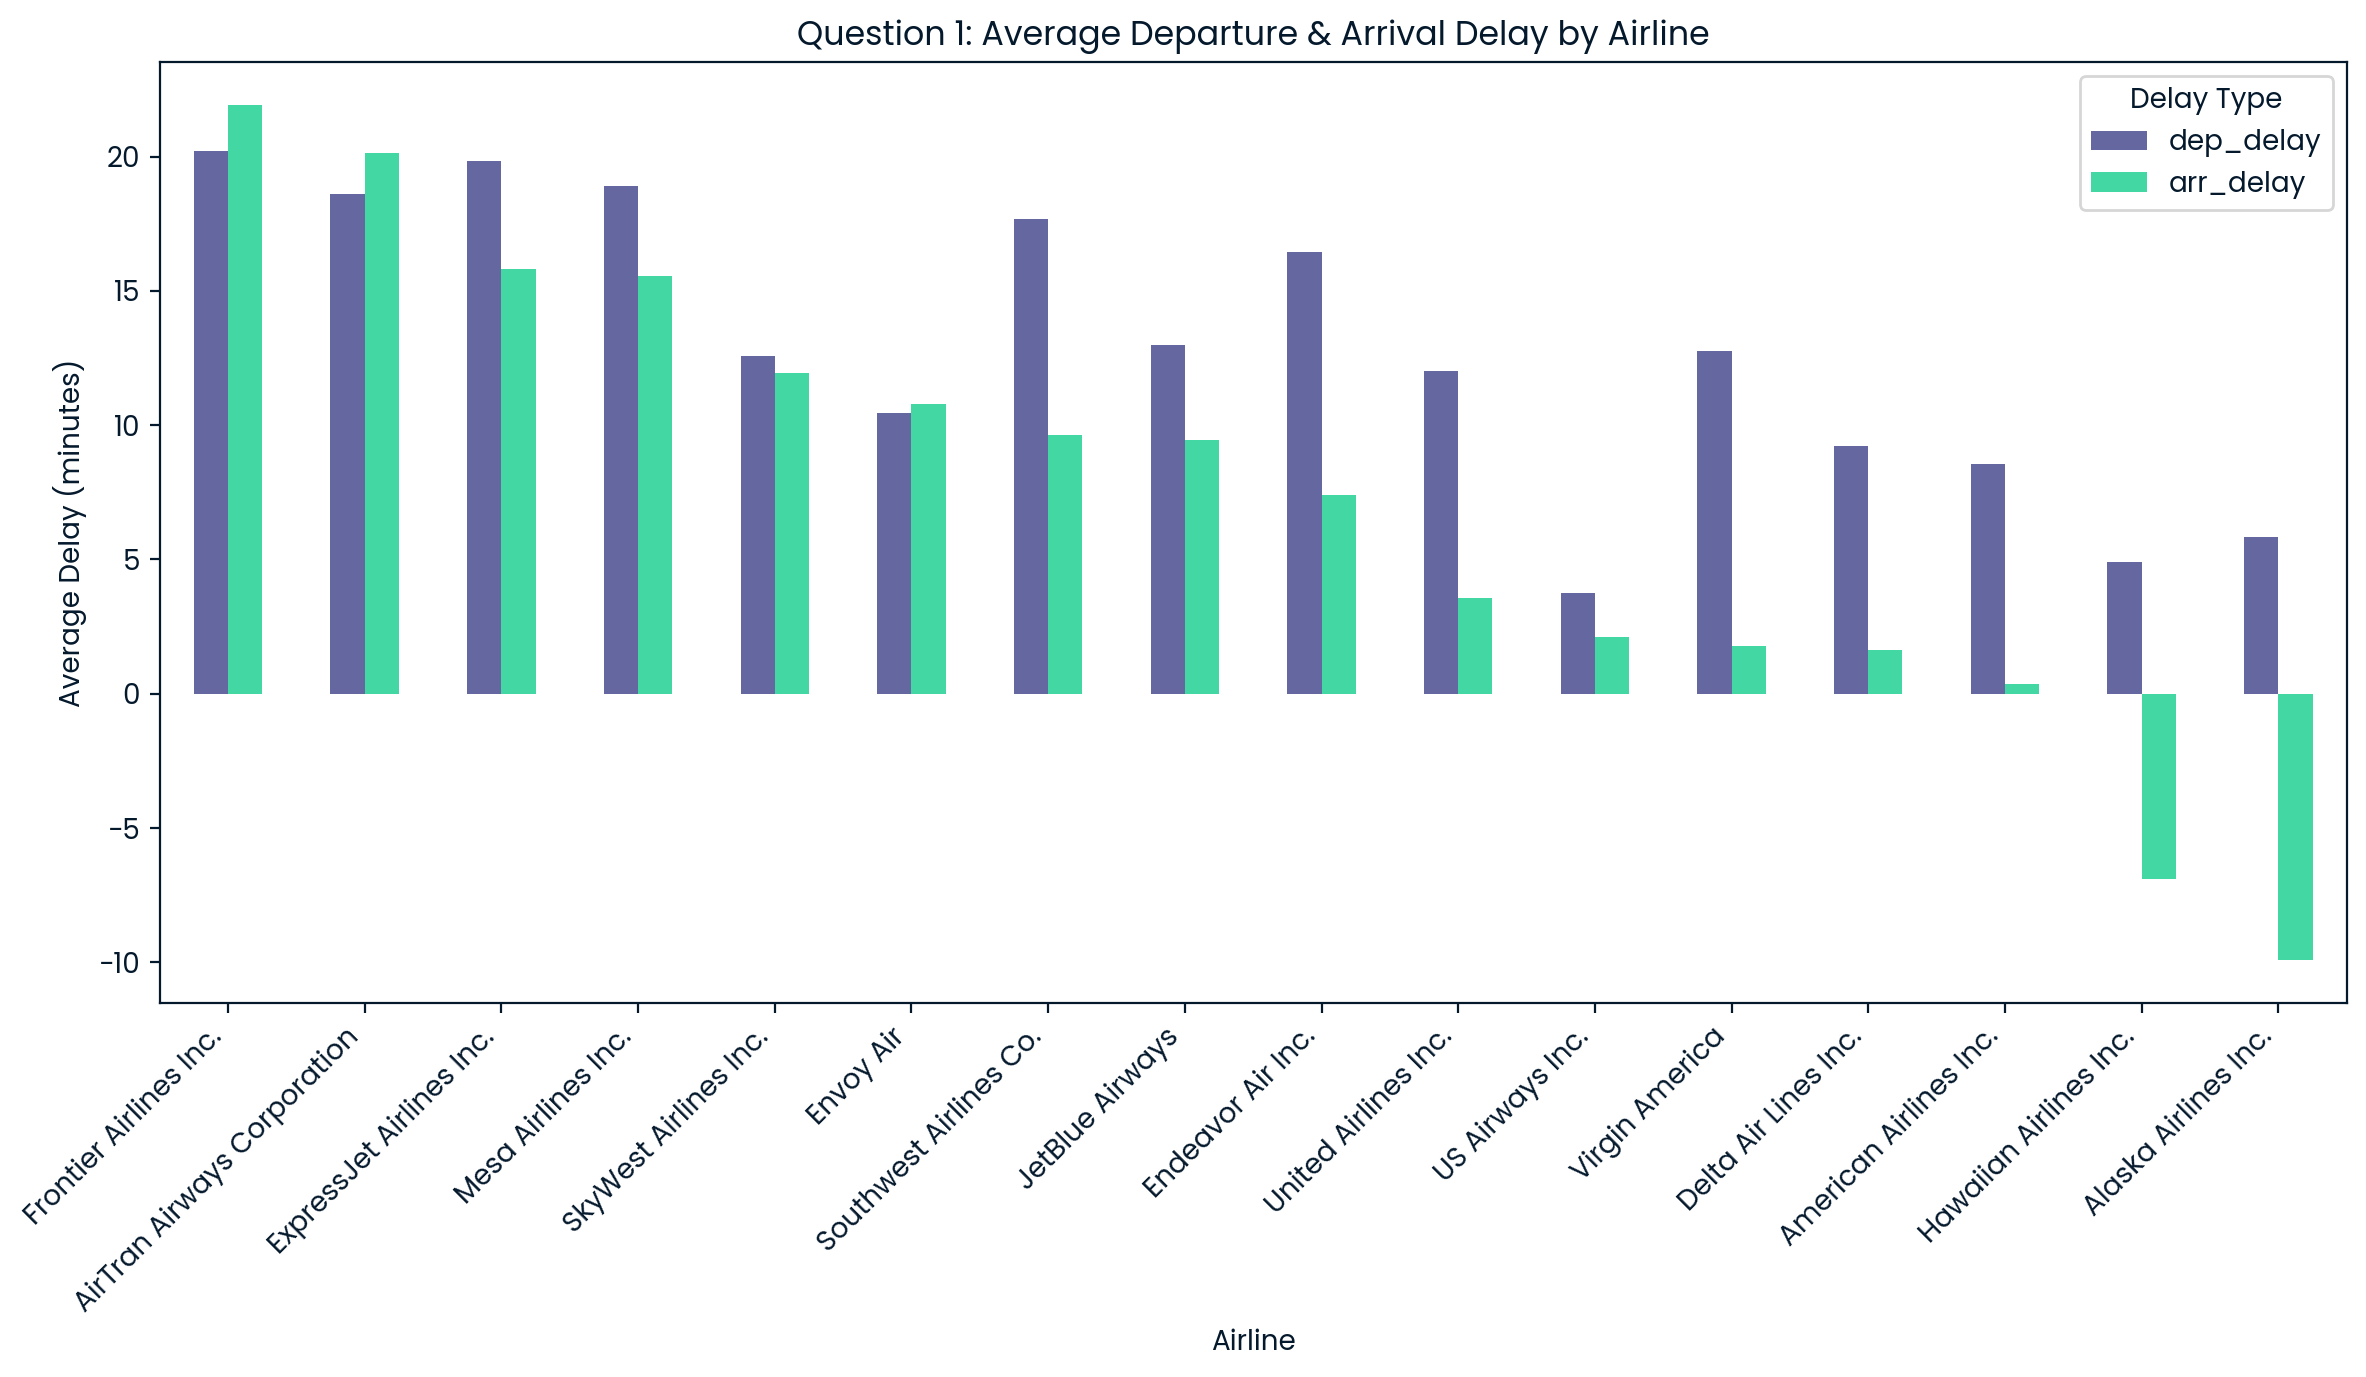

In [8]:
# --- Question 1: How do different airlines compare? ---

# We group the data by 'airline_name' and calculate the mean for 
# both departure and arrival delays, sorting to find the worst offenders.
airline_delays = merge_data.groupby('airline_name')[['dep_delay', 'arr_delay']].mean().sort_values(by='arr_delay', ascending=False)
print(airline_delays)

# We create a bar plot to visualize the performance comparison.
plt.figure(figsize=(12, 7))
airline_delays.plot(kind='bar', ax=plt.gca())
plt.title('Question 1: Average Departure & Arrival Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Delay Type')
plt.tight_layout()


# --- Question 2: Are there particular months/weeks/time of day with more delays? ---

To answers Question 2, we creates three separate plots to analyze each time component.

Month: A line plot is perfect for showing seasonal trends (like higher summer/winter delays).

Day of Week: A bar chart (sorted by day_of_week number) compares days.

Time of Day: A bar chart using our custom bins reveals if delays build up throughout the day (known as cumulative delay).

month
1      6.129972
2      5.613019
3      5.807577
4     11.176063
5      3.521509
6     16.481330
7     16.711307
8      6.040652
9     -4.018364
10    -0.167063
11     0.461347
12    14.870355
Name: arr_delay, dtype: float64


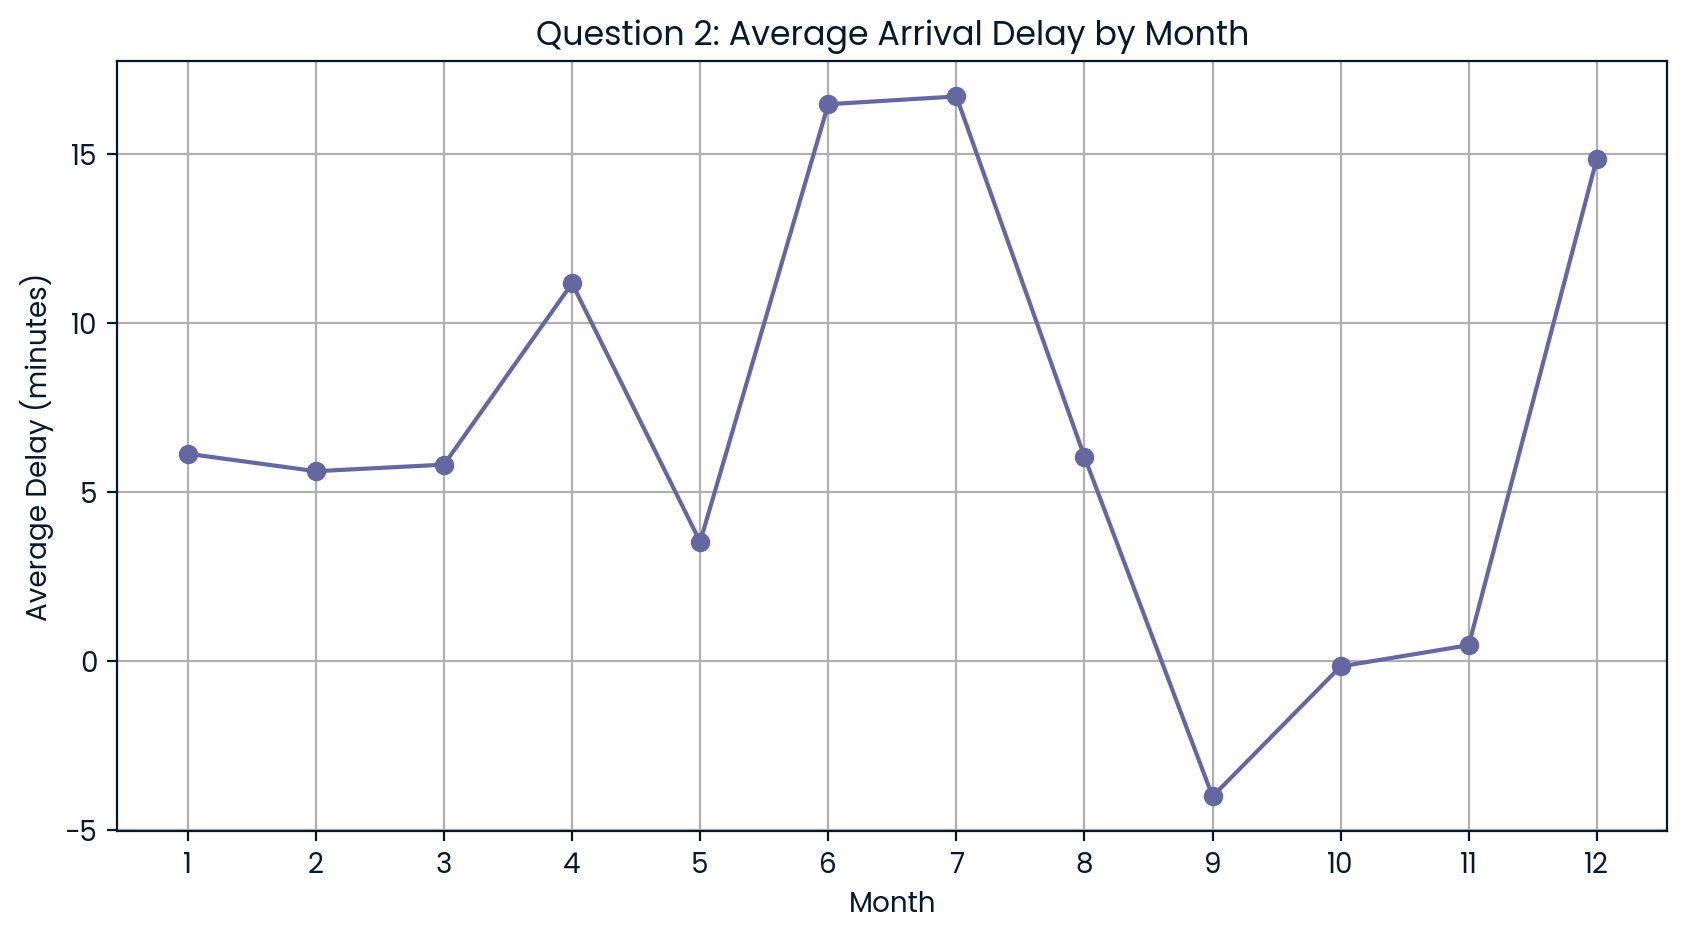

In [9]:
# --- Analysis by Month ---
monthly_delay = merge_data.groupby('month')['arr_delay'].mean()
print(monthly_delay)
plt.figure(figsize=(10, 5))
monthly_delay.plot(kind='line', marker='o')
plt.title('Question 2: Average Arrival Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.xticks(range(1, 13))
plt.grid(True)




   day_of_week   day_name  arr_delay
0            0     Monday   7.051119
1            1    Tuesday  11.740819
2            2  Wednesday   9.070120
3            3   Thursday  -1.448828
4            4     Friday   4.820024
5            5   Saturday   9.653739
6            6     Sunday   5.388526


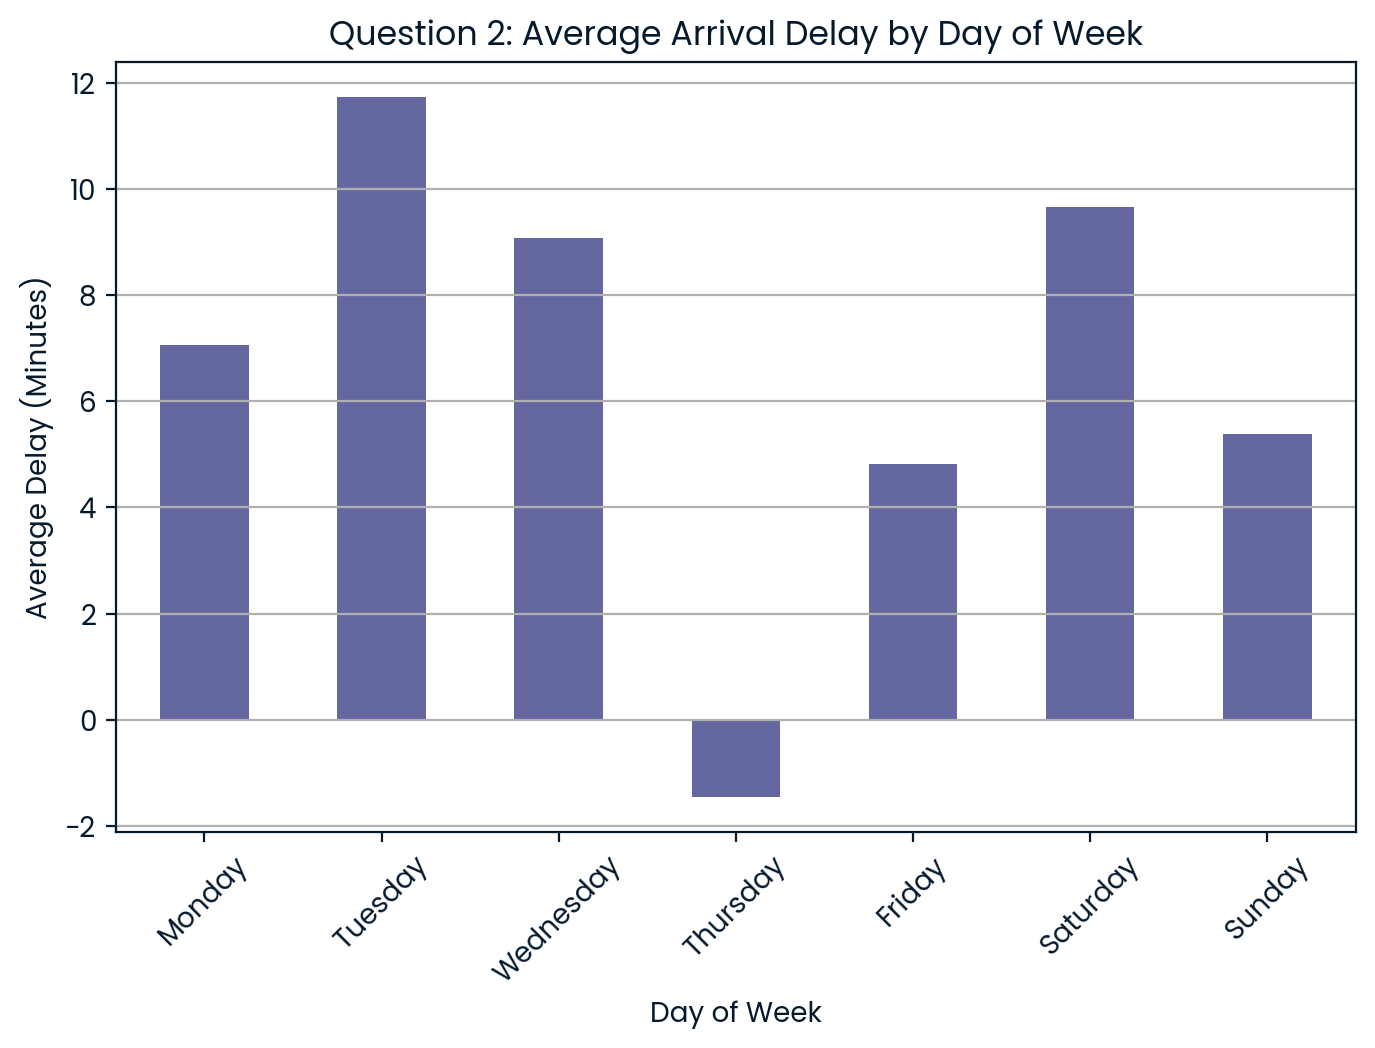

In [10]:
# --- Analysis by Day of Week ---
daily_avg_delays = merge_data.groupby(['day_of_week', 'day_name'])['arr_delay'].mean().sort_index().reset_index()
print(daily_avg_delays)

plt.figure(figsize=(8, 5))
daily_avg_delays.plot(
    kind='bar', 
    x='day_name', 
    y='arr_delay', 
    legend=False,
    ax=plt.gca()
)
plt.title('Question 2: Average Arrival Delay by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Delay (Minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y')


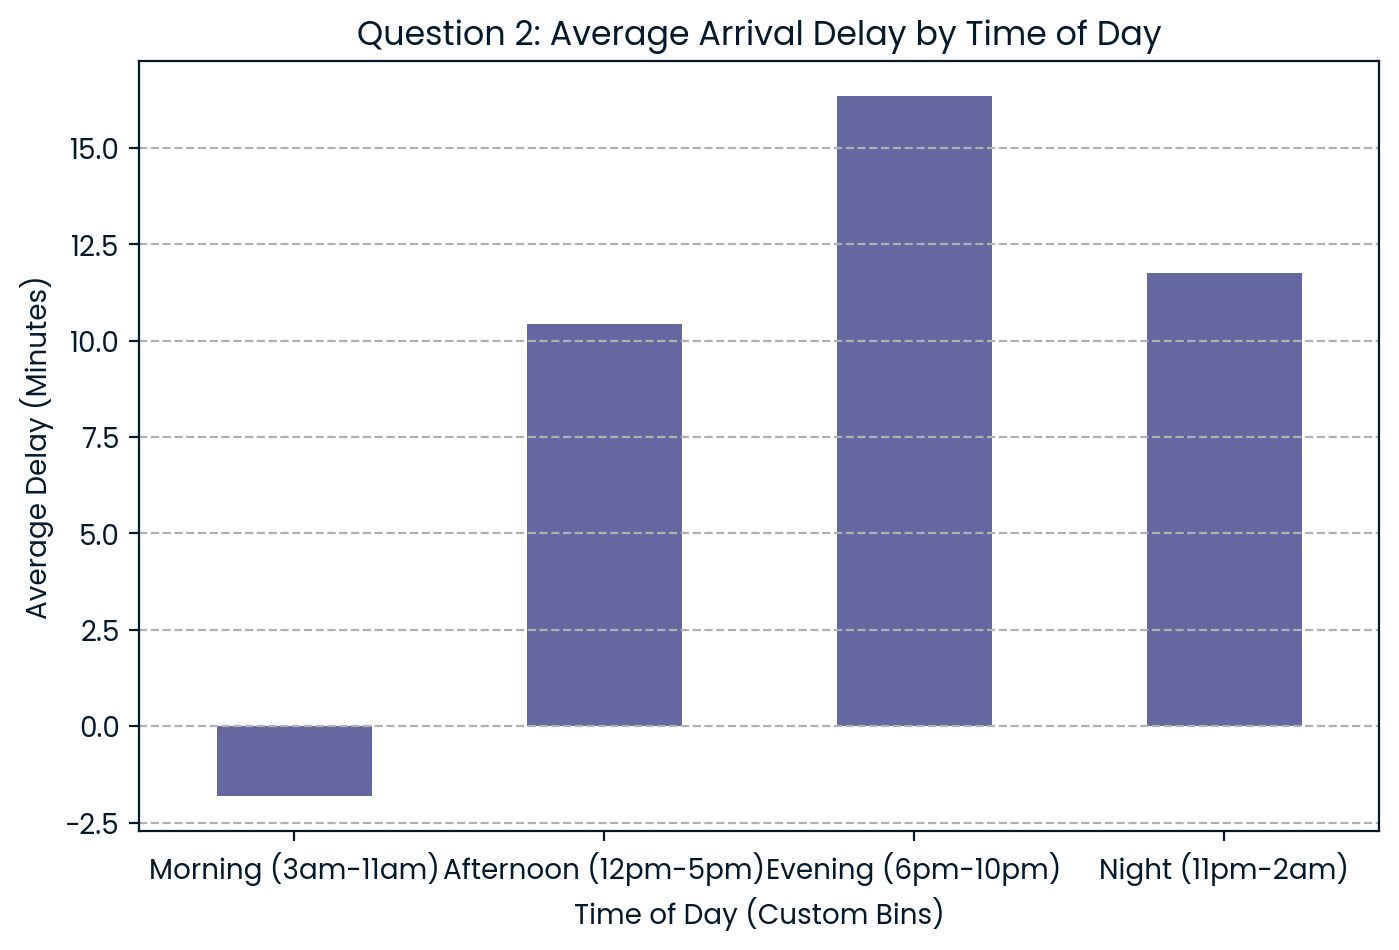

In [11]:
# --- Analysis by Time of Day ---

time_of_day_delay = merge_data.groupby('time_of_day')['arr_delay'].mean()
# We manually re-index to get a logical (Morning -> Night) order on the chart.
custom_order = [
    'Morning (3am-11am)', 
    'Afternoon (12pm-5pm)', 
    'Evening (6pm-10pm)', 
    'Night (11pm-2am)'
]
time_of_day_delay_sorted = time_of_day_delay.reindex(custom_order)

plt.figure(figsize=(8, 5))
time_of_day_delay_sorted.plot(
    kind='bar',
    rot=0,
    ax=plt.gca()
)
plt.title('Question 2: Average Arrival Delay by Time of Day')
plt.xlabel('Time of Day (Custom Bins)')
plt.ylabel('Average Delay (Minutes)')
plt.grid(axis='y', linestyle='--')


# To answer Question 3, we investigate whether delays are caused by traffic volume. We group the data to calculate two separate metrics:

**Punctuality:** The average `dep_delay` (for `origin`) or `arr_delay` (for `dest`).

**Traffic Volume:** The total count of flights (using the `id` column) for each airport.

We print these lists side-by-side. This allows us to make an informed comparison and see if the airports with the most traffic are also the ones with the worst delays.

In [12]:
# --- Question 3: How do different airports compare? ---
print("\n--- Question 3: Airport Analysis ---")

# --- Origin Airport Analysis ---
# 1. Punctuality: Worst Departure Delays by Origin
origin_dep_delays = merge_data.groupby('origin')['dep_delay'].mean().sort_values(ascending=False)
print("\nTop 3 Worst Origin Airports (Departure Delays):\n", origin_dep_delays.head(3))

# 2. Traffic: Busiest Origin Airports
origin_traffic = merge_data.groupby('origin')['id'].count().sort_values(ascending=False)
print("\nTop 3 Busiest Origin Airports (Traffic Volume):\n", origin_traffic.head(3))

# --- Destination Airport Analysis ---
# 3. Punctuality: Worst Arrival Delays by Destination
dest_arr_delays = merge_data.groupby('dest')['arr_delay'].mean().sort_values(ascending=False)
print("\nTop 5 Worst Destination Airports (Arrival Delays):\n", dest_arr_delays.head(5))

# 4. Traffic: Busiest Destination Airports
dest_traffic = merge_data.groupby('dest')['id'].count().sort_values(ascending=False)
print("\nTop 5 Busiest Destination Airports (Traffic Volume):\n", dest_traffic.head(5))


--- Question 3: Airport Analysis ---

Top 3 Worst Origin Airports (Departure Delays):
 origin
EWR    15.009110
JFK    12.023607
LGA    10.286583
Name: dep_delay, dtype: float64

Top 3 Busiest Origin Airports (Traffic Volume):
 origin
EWR    117127
JFK    109079
LGA    101140
Name: id, dtype: int64

Top 5 Worst Destination Airports (Arrival Delays):
 dest
CAE    41.764151
TUL    33.659864
OKC    30.619048
JAC    28.095238
TYS    24.069204
Name: arr_delay, dtype: float64

Top 5 Busiest Destination Airports (Traffic Volume):
 dest
ATL    16837
ORD    16566
LAX    16026
BOS    15022
MCO    13967
Name: id, dtype: int64


# We explore the impact of flight distance. 
The bar chart shows the average delay for our 'Short', 'Medium', and 'Long Haul' categories. We also print the Pearson correlation coefficient (using `.corr`()). This number tells us the statistical relationship; a value near 0, as seen here, suggests there is no strong linear relationship between how long a flight is and how delayed it will be.


--- Average Delay by Distance Category ---
distance_category
Short Haul (<750 mi)         9.227668
Medium Haul (750-2000 mi)    6.571762
Long Haul (>2000 mi)         1.312786
Name: arr_delay, dtype: float64

--- Correlation between Distance and Arrival Delay ---
           distance  arr_delay
distance   1.000000  -0.061868
arr_delay -0.061868   1.000000


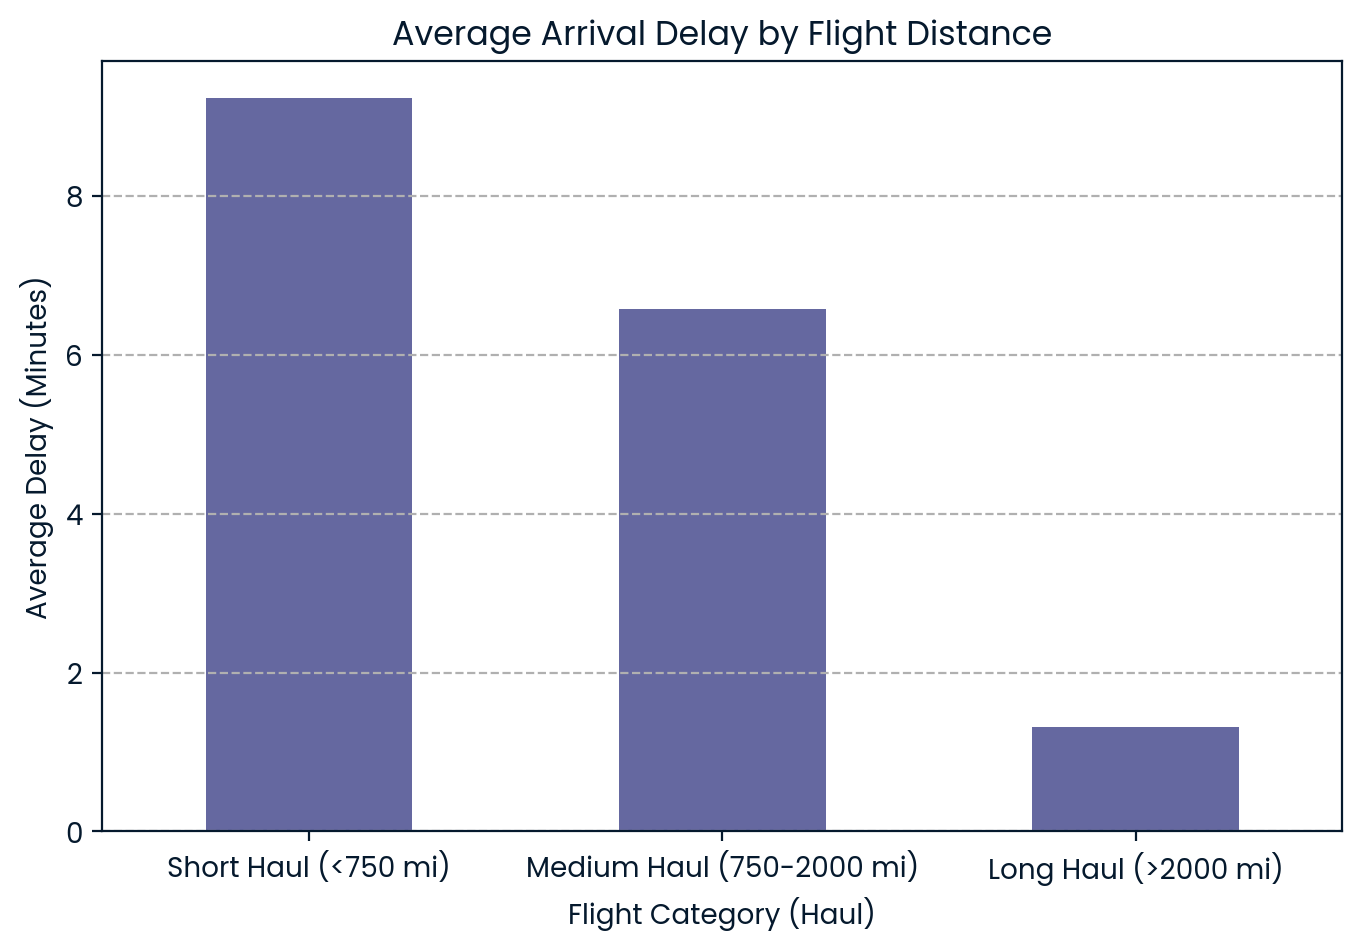

In [13]:
# --- Analysis by Flight Distance (Haul Category) ---

# We group by the 'distance_category' we created and get the mean delay
distance_delays = merge_data.groupby('distance_category')['arr_delay'].mean()

print("\n--- Average Delay by Distance Category ---")
print(distance_delays)

# We plot the results
plt.figure(figsize=(8, 5))
distance_delays.plot(kind='bar', rot=0)
plt.title('Average Arrival Delay by Flight Distance')
plt.xlabel('Flight Category (Haul)')
plt.ylabel('Average Delay (Minutes)')
plt.grid(axis='y', linestyle='--')


# --- Statistical Correlation ---
# We can also check the direct statistical correlation between distance and delay
correlation = merge_data[['distance', 'arr_delay']].corr()
print("\n--- Correlation between Distance and Arrival Delay ---")
print(correlation)

# This final analysis looks at operational factors.

We group by airline_name to see which carriers are best at "making up" time in the air. A higher number is better, meaning they compensate for departure delays.

We group by tailnum (the plane's unique ID) to find the "worst" individual planes by average delay. We compare this to the busiest planes to see if specific, over-worked aircraft are responsible for more delays, which could suggest maintenance or scheduling issues.

This completes our full exploratory analysis.

In [14]:
# --- Analysis of "Making Up Time" by Airline ---

# We group by airline and find the average of the 'time_gained_in_air' column
time_gained_by_airline = merge_data.groupby('airline_name')['time_gained_in_air'].mean().sort_values(ascending=False)

print("\n--- Average Time 'Made Up' in the Air (by Airline) ---")
print(time_gained_by_airline)

# --- Analysis by Specific Aircraft (Tail Number) ---

# 1. We find the average delay for each specific plane
plane_delays = merge_data.groupby('tailnum')['arr_delay'].mean().sort_values(ascending=False)
print("\n--- Top 10 Worst Individual Airplanes (by Average Delay) ---")
print(plane_delays.head(10))

# 2. We find the busiest planes to compare
busiest_planes = merge_data.groupby('tailnum')['id'].count().sort_values(ascending=False)
print("\n--- Top 10 Busiest Individual Airplanes (by Flight Count) ---")
print(busiest_planes.head(10))


--- Average Time 'Made Up' in the Air (by Airline) ---
airline_name
Alaska Airlines Inc.           15.761636
Hawaiian Airlines Inc.         11.815789
Virgin America                 10.992181
Endeavor Air Inc.               9.059905
United Airlines Inc.            8.458897
American Airlines Inc.          8.204839
Southwest Airlines Co.          8.012537
Delta Air Lines Inc.            7.579609
ExpressJet Airlines Inc.        4.042498
JetBlue Airways                 3.509575
Mesa Airlines Inc.              3.341912
US Airways Inc.                 1.615098
SkyWest Airlines Inc.           0.655172
Envoy Air                      -0.329353
AirTran Airways Corporation    -1.509921
Frontier Airlines Inc.         -1.719530
Name: time_gained_in_air, dtype: float64

--- Top 10 Worst Individual Airplanes (by Average Delay) ---
tailnum
N844MH    320.000000
N911DA    294.000000
N922EV    276.000000
N587NW    264.000000
N851NW    219.000000
N928DN    201.000000
N7715E    188.000000
N654UA    185.000